In [312]:
import pandas as pd

from datetime import datetime

In [313]:
added_sprint_tasks_file = '[ADDED_SPRINT_TASKS_FILE]'

current_sprint_file = '[CURRENT_SPRINT_FILE]'

df = pd.read_excel(added_sprint_tasks_file, header=None)

df

,0,1,2,3
0,IN PROGRESS Current status: IN PROGRESS Task 1,Mar 05 at 12:00 AM,Task added,2 pts
1,IN PROGRESS Current status: IN PROGRESS Task 2,Mar 08 at 12:00 AM,Effort changed 1 → 5,3 pts
2,IN PROGRESS Current status: IN PROGRESS Task 3,Mar 06 at 12:00 AM,Effort changed 3 → 5,2 pts
3,IN PROGRESS Current status: IN PROGRESS Task 4,Mar 09 at 12:00 AM,Effort changed 3 → 3,2 pts
4,IN PROGRESS Current status: IN PROGRESS Task 5,Mar 04 at 12:00 AM,Task added,5 pts
...,...,...,...,...
95,IN PROGRESS Current status: IN PROGRESS Task 96,Mar 03 at 12:00 AM,Task added,1 pts
96,IN PROGRESS Current status: IN PROGRESS Task 97,Mar 03 at 12:00 AM,Effort changed 3 → 5,3 pts
97,TO DO Current status: TO DO Task 98,Mar 07 at 12:00 AM,Task added,#ERROR!
98,TO DO Current status: TO DO Task 99,Mar 06 at 12:00 AM,Task added,#ERROR!


In [314]:
statuses = 'TO DO|IN PROGRESS|IN REVIEW|BLOCKED|READY FOR TESTING|TESTING IN PROGRESS|DONE|CLOSED'  

df[['end_status','task_name']] = df[0].str.split('Current status:', expand=True)

df


,0,1,2,3,end_status,task_name
0,IN PROGRESS Current status: IN PROGRESS Task 1,Mar 05 at 12:00 AM,Task added,2 pts,IN PROGRESS,IN PROGRESS Task 1
1,IN PROGRESS Current status: IN PROGRESS Task 2,Mar 08 at 12:00 AM,Effort changed 1 → 5,3 pts,IN PROGRESS,IN PROGRESS Task 2
2,IN PROGRESS Current status: IN PROGRESS Task 3,Mar 06 at 12:00 AM,Effort changed 3 → 5,2 pts,IN PROGRESS,IN PROGRESS Task 3
3,IN PROGRESS Current status: IN PROGRESS Task 4,Mar 09 at 12:00 AM,Effort changed 3 → 3,2 pts,IN PROGRESS,IN PROGRESS Task 4
4,IN PROGRESS Current status: IN PROGRESS Task 5,Mar 04 at 12:00 AM,Task added,5 pts,IN PROGRESS,IN PROGRESS Task 5
...,...,...,...,...,...,...
95,IN PROGRESS Current status: IN PROGRESS Task 96,Mar 03 at 12:00 AM,Task added,1 pts,IN PROGRESS,IN PROGRESS Task 96
96,IN PROGRESS Current status: IN PROGRESS Task 97,Mar 03 at 12:00 AM,Effort changed 3 → 5,3 pts,IN PROGRESS,IN PROGRESS Task 97
97,TO DO Current status: TO DO Task 98,Mar 07 at 12:00 AM,Task added,#ERROR!,TO DO,TO DO Task 98
98,TO DO Current status: TO DO Task 99,Mar 06 at 12:00 AM,Task added,#ERROR!,TO DO,TO DO Task 99


In [315]:

df['task_name'] = df['task_name'].str.replace(statuses,'',regex=True).str.strip()

df.columns = ['string_name', 'string_date','string_action','points','end_status','task_name']

df[['date','time']] = df['string_date'].str.split('at ',expand=True)

df['date'] = df['date'].str.strip()

df['full_date'] = df['string_date'].str.replace('at ','').str.strip()

df['full_date'] = pd.to_datetime(df['full_date'], format='%b %d %I:%M %p')

current_year = datetime.now().year

df['full_date'] = df['full_date'].apply(lambda x: x.replace(year=current_year))

df['day_date'] = df['full_date'].dt.strftime('%m-%d-%Y')

df

,string_name,string_date,string_action,points,end_status,task_name,date,time,full_date,day_date
0,IN PROGRESS Current status: IN PROGRESS Task 1,Mar 05 at 12:00 AM,Task added,2 pts,IN PROGRESS,Task 1,Mar 05,12:00 AM,2025-03-05,03-05-2025
1,IN PROGRESS Current status: IN PROGRESS Task 2,Mar 08 at 12:00 AM,Effort changed 1 → 5,3 pts,IN PROGRESS,Task 2,Mar 08,12:00 AM,2025-03-08,03-08-2025
2,IN PROGRESS Current status: IN PROGRESS Task 3,Mar 06 at 12:00 AM,Effort changed 3 → 5,2 pts,IN PROGRESS,Task 3,Mar 06,12:00 AM,2025-03-06,03-06-2025
3,IN PROGRESS Current status: IN PROGRESS Task 4,Mar 09 at 12:00 AM,Effort changed 3 → 3,2 pts,IN PROGRESS,Task 4,Mar 09,12:00 AM,2025-03-09,03-09-2025
4,IN PROGRESS Current status: IN PROGRESS Task 5,Mar 04 at 12:00 AM,Task added,5 pts,IN PROGRESS,Task 5,Mar 04,12:00 AM,2025-03-04,03-04-2025
...,...,...,...,...,...,...,...,...,...,...
95,IN PROGRESS Current status: IN PROGRESS Task 96,Mar 03 at 12:00 AM,Task added,1 pts,IN PROGRESS,Task 96,Mar 03,12:00 AM,2025-03-03,03-03-2025
96,IN PROGRESS Current status: IN PROGRESS Task 97,Mar 03 at 12:00 AM,Effort changed 3 → 5,3 pts,IN PROGRESS,Task 97,Mar 03,12:00 AM,2025-03-03,03-03-2025
97,TO DO Current status: TO DO Task 98,Mar 07 at 12:00 AM,Task added,#ERROR!,TO DO,Task 98,Mar 07,12:00 AM,2025-03-07,03-07-2025
98,TO DO Current status: TO DO Task 99,Mar 06 at 12:00 AM,Task added,#ERROR!,TO DO,Task 99,Mar 06,12:00 AM,2025-03-06,03-06-2025


In [316]:
df['action'] = df['string_action'].str.replace('\d','',regex=True)

df['action'] = df['action'].str.replace('→','',regex=True)

df['action'] = df['action'].str.replace(".",'',regex=True).str.strip()

In [317]:
df[['a_1','a_2','original_points','char','new_points']] = df['string_action'].str.split(' ', expand=True)


sprint_worked_added = df[['task_name','action','full_date','day_date','date','time','end_status','original_points','new_points']]
sprint_worked_added

,task_name,action,full_date,day_date,date,time,end_status,original_points,new_points
0,Task 1,Task added,2025-03-05,03-05-2025,Mar 05,12:00 AM,IN PROGRESS,None,None
1,Task 2,Effort changed,2025-03-08,03-08-2025,Mar 08,12:00 AM,IN PROGRESS,1,5
2,Task 3,Effort changed,2025-03-06,03-06-2025,Mar 06,12:00 AM,IN PROGRESS,3,5
3,Task 4,Effort changed,2025-03-09,03-09-2025,Mar 09,12:00 AM,IN PROGRESS,3,3
4,Task 5,Task added,2025-03-04,03-04-2025,Mar 04,12:00 AM,IN PROGRESS,None,None
...,...,...,...,...,...,...,...,...,...
95,Task 96,Task added,2025-03-03,03-03-2025,Mar 03,12:00 AM,IN PROGRESS,None,None
96,Task 97,Effort changed,2025-03-03,03-03-2025,Mar 03,12:00 AM,IN PROGRESS,3,5
97,Task 98,Task added,2025-03-07,03-07-2025,Mar 07,12:00 AM,TO DO,None,None
98,Task 99,Task added,2025-03-06,03-06-2025,Mar 06,12:00 AM,TO DO,None,None


In [318]:
current_sprint_file = pd.read_excel(current_sprint_file)

merged = pd.merge(sprint_worked_added, current_sprint_file, left_on = 'task_name', right_on = 'Task Name')

merged = merged[['Task ID','Task Name','End Status','Team','Task Kind','full_date','day_date','date','time','action','original_points','new_points']]

merged

,Task ID,Task Name,End Status,Team,Task Kind,full_date,day_date,date,time,action,original_points,new_points
0,T001,Task 1,IN REVIEW,Team 1,Roadmap,2025-03-05,03-05-2025,Mar 05,12:00 AM,Task added,None,None
1,T002,Task 2,TESTING IN PROGRESS,Team 3,Roadmap,2025-03-08,03-08-2025,Mar 08,12:00 AM,Effort changed,1,5
2,T003,Task 3,READY FOR TESTING,Team 3,Roadmap,2025-03-06,03-06-2025,Mar 06,12:00 AM,Effort changed,3,5
3,T004,Task 4,DONE,Team 3,Bug,2025-03-09,03-09-2025,Mar 09,12:00 AM,Effort changed,3,3
4,T005,Task 5,BLOCKED,Team 3,Customer Request,2025-03-04,03-04-2025,Mar 04,12:00 AM,Task added,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
95,T096,Task 96,CLOSED,Team 3,Customer Request,2025-03-03,03-03-2025,Mar 03,12:00 AM,Task added,None,None
96,T097,Task 97,IN REVIEW,Team 3,Customer Request,2025-03-03,03-03-2025,Mar 03,12:00 AM,Effort changed,3,5
97,T098,Task 98,TESTING IN PROGRESS,Team 3,Roadmap,2025-03-07,03-07-2025,Mar 07,12:00 AM,Task added,None,None
98,T099,Task 99,CLOSED,Team 2,Roadmap,2025-03-06,03-06-2025,Mar 06,12:00 AM,Task added,None,None


In [319]:
import matplotlib.pyplot as plt
import seaborn as sns

In [320]:
tasks_added_only = merged[merged['action'] == 'Task added']

In [321]:
tasks_added = tasks_added_only.groupby('Team')['Task ID'].count().reset_index()

<Axes: xlabel='Team', ylabel='Task ID'>

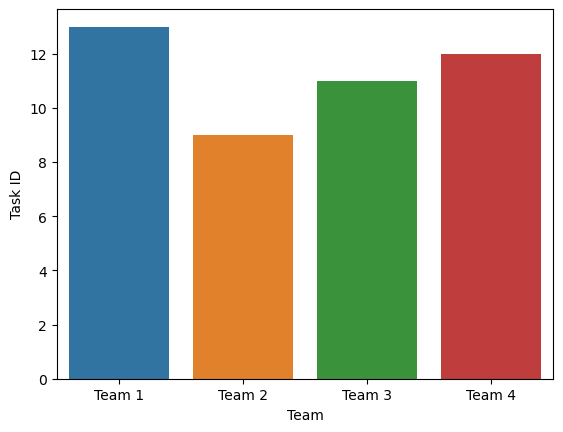

In [322]:
sns.barplot(data = tasks_added, x = 'Team', y = 'Task ID')

In [323]:
tasks_added_date = tasks_added_only.groupby(['date','Team'])['Task ID'].count().reset_index()

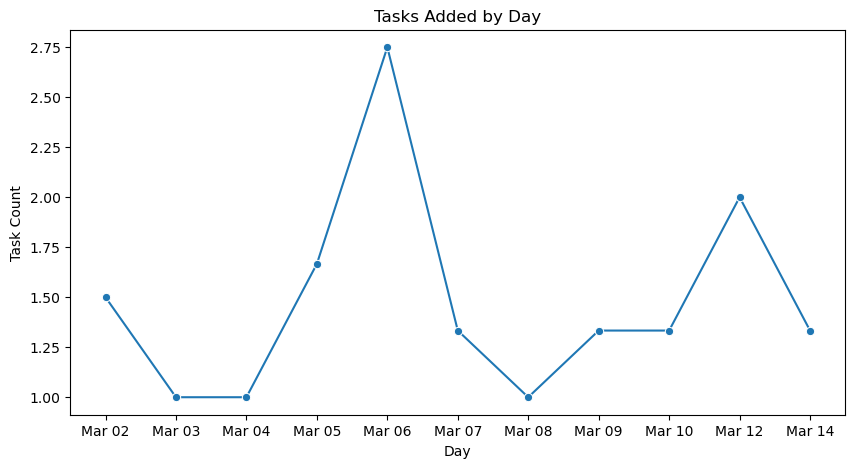

In [324]:
plt.figure(figsize=(10,5))

sns.lineplot(data=tasks_added_date, x = 'date', y = 'Task ID', errorbar=None, marker='o')

plt.title('Tasks Added by Day')
plt.xlabel('Day')
plt.ylabel('Task Count')

plt.show()

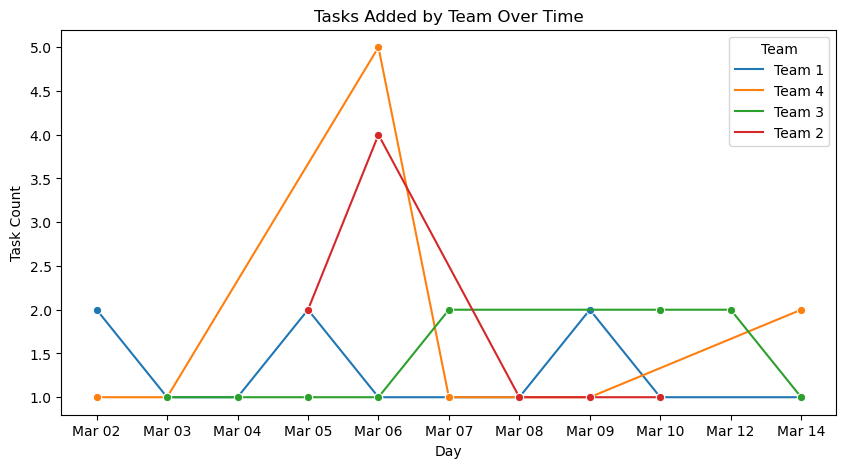

In [325]:
plt.figure(figsize=(10,5))

sns.lineplot(data=tasks_added_date, x = 'date', y = 'Task ID', hue='Team', marker='o')

plt.title('Tasks Added by Team Over Time')
plt.xlabel('Day')
plt.ylabel('Task Count')

plt.show()

In [326]:
tasks_kind_added = tasks_added_only.groupby(['date','Task Kind'])['Task ID'].count().reset_index()

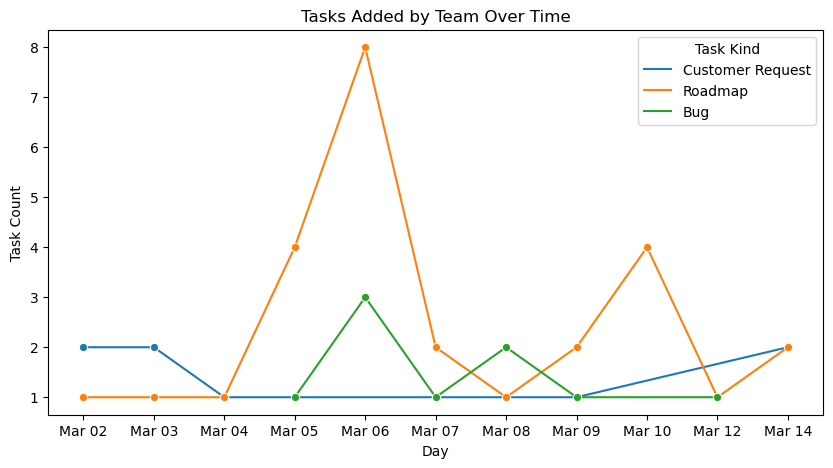

In [327]:
plt.figure(figsize=(10,5))

sns.lineplot(data=tasks_kind_added, x = 'date', y = 'Task ID', hue='Task Kind', marker='o')

plt.title('Tasks Added by Team Over Time')
plt.xlabel('Day')
plt.ylabel('Task Count')

plt.show()

In [328]:
task_kind_group = tasks_added_only.groupby('Task Kind')['Task ID'].count().reset_index()

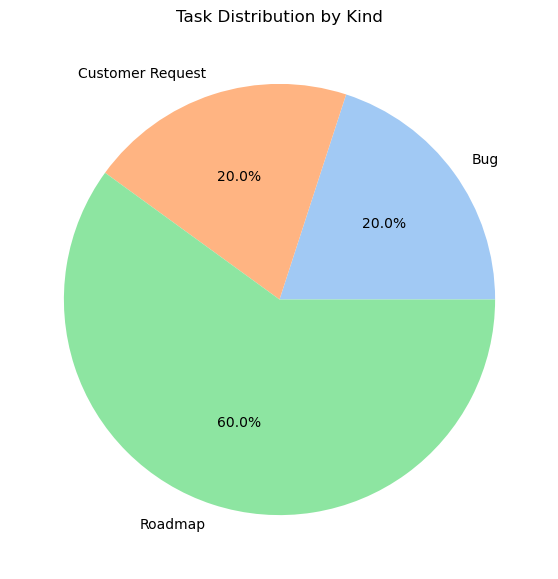

In [329]:
labels = task_kind_group['Task Kind']
sizes = task_kind_group['Task ID']

colors = sns.color_palette("pastel")

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)

plt.title("Task Distribution by Kind")

plt.show()


# Findings

• Team 1 added the most tasks, but all teams are adding extra tasks after the start of the sprint.
<br>• Most tasks were added mid-sprint on March 6th by Team 2 and Team 4.
<br>• 60% of the tasks added were Roadmap tasks.

# Recommendation

Roadmap work being added mid-sprint was an issue for 2 teams and signals a planning/work scope issue. We should dig into why each of these individual tasks were deemed urgent enough to be added that late in the sprint.